# Лабораторна робота 1

### Аналізуємо QuickSort та MergeSort. 

In [1]:
from datetime import datetime
from numpy import euler_gamma
from math import log
import sys 
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt

**Завдання 1.** Напишіть програми, які обчислюють середню кількість порівнянь в QuickSort за рекурсіями двома способами: 
- (I)    $C_{n} = n + 1 + \frac{1}{n} \sum \limits_{i=1} ^{n} (C_{i-1} + C_{n-i}), C_{0}=0$

In [2]:
def Cn_1(n):
    if n == 0:
        return 0
    s = 0
    for i in range(1, n+1):
        s += Cn_1(i-1) + Cn_1(n-i)
    return n + 1 + (1/n)*s

- (II)   $C_{n} = \frac{n+1}{n} C_{n-1} + 2, C_{0}=0$

In [3]:
def Cn_2(n):
    if n == 0:
        return 0
    return ((n+1)/n) * Cn_2(n-1) + 2

Проведіть наступні експерименти та поясніть результати.

**(а)** Порівняйте час роботи з обчислення $C_{n}$ першим та другим методом.

In [4]:
def calculate_time(f, *args):
    """ Повертає час виконання функції f у секундах. """
    start = datetime.now()
    f(*args)
    full_time = datetime.now() - start
    sec = full_time.seconds
    msec = full_time.microseconds
    return sec + (msec // 10 ** (len(str(msec)) - 3)) * 0.001
    # результати чисельно досить малі, можуть суттєво відрізнятись після кожного запуску

In [5]:
# Cn_1(16)  <=>  10 seconds
# Cn_1(17)  <=>  27 seconds
# Cn_1(18)  <=>  87 seconds

# Cn_2(16)  <=>  0.189 seconds
# Cn_2(17)  <=>  0.209 seconds
# Cn_2(18)  <=>  0.249 seconds

calculate_time(Cn_1, 15)

4.389

**Висновок:** другим методом $C_{n}$ обчислюється швидше.

**(б)** Обчисліть $C_n$ для $n \leq 10^5$ та порівняйте з наближенням $C_{n} \approx 2(n+1)(ln(n+1) + \gamma - 1)$

In [6]:
def approx_Cn(n):
    return 2 * (n+1) * (log(n+1) + euler_gamma - 1)

In [7]:
n1 = 10**4
v1 = approx_Cn(n1)
v1

175770.69594962476

In [8]:
sys.setrecursionlimit(10**5)

v2 = Cn_2(n1)
v2

175771.69593295958

In [9]:
er1 = abs(v1 - v2)  # похибка
er1

0.9999833348265383

**(в)** Використати кращу апроксимацію для гармонічних чисел $H_{n}$ для отримання кращої апроксимації для чисел $C_{n}$.

In [10]:
def harmonic(n):
    s = 0
    for i in range(1, n+1):
        s += 1/i
    return s

In [11]:
v3 = 2 * (n1+1) * (harmonic(n1+1) - 1)
v3

175771.69593295903

In [12]:
er2 = abs(v3 - v2)
er2

5.529727786779404e-10

**(г)** Порівняйте час обчислення $C_{n}$ за рекурсією (II) та час обчислення наближеного значення.

In [13]:
calculate_time(Cn_2, 1000)

0.651

In [14]:
calculate_time(approx_Cn, 1000)

0.11900000000000001

**Висновок:** обчислення наближеного значення швидше за рекурсію.

**Завдання 2.** Реалізуйте QuickSort та MergeSort.

In [15]:
def quick_sort(lst):
    
    def _quick_sort(array, a, b):
        if a >= b:
            return array
        pivot = array[a + (b - a) // 2]
        left = a
        right = b

        while True:
            while array[left] < pivot:
                left += 1

            while pivot < array[right]:
                right -= 1

            if left >= right:
                break

            array[left], array[right] = array[right], array[left]
            left += 1
            right -= 1

        _quick_sort(array, a, right)
        _quick_sort(array, right + 1, b)
    
    return _quick_sort(lst, 0, len(lst) - 1)

In [16]:
a = [-1, 0, 2, -65, 5]
quick_sort(a)
a

[-65, -1, 0, 2, 5]

In [17]:
def merge_sort(array):
    if len(array) <= 1:
        return array
    
    half = len(array) // 2
    left = merge_sort(array[:half])
    right = merge_sort(array[half:])
    return merge(left, right)


def merge(left, right):    
    left_index = 0
    right_index = 0
    result = []
    while left_index < len(left) and right_index < len(right):
        if left[left_index] < right[right_index]:
            result.append(left[left_index])
            left_index += 1
        else:
            result.append(right[right_index])
            right_index += 1
    
    result += left[left_index:]
    result += right[right_index:]
    return result

In [18]:
a = [-1, 0, 2, -65, 5]
a = merge_sort(a)
a

[-65, -1, 0, 2, 5]

**(а) (Порівняння)** Згенеруйте масиви розміру $n = 10^4, 10^5, 10^6$ як випадкові перестановки чисел $1, 2, ..., n$, і порівняйте час роботи QuickSort та MergeSort по сортуванню цих масивів. (Візьміть середній час роботи по сортуванню, наприклад, $10^2$ випадкових масивів для кожного $n$.)

In [19]:
for n in [4, 5, 6]:
    ms = []
    qs = []
    for i in range(100):
        arr = list(np.random.permutation(10**n))
        ms.append(calculate_time(merge_sort, arr))
        qs.append(calculate_time(quick_sort, arr))
    print("n = 10^{}:".format(n))    
    print("    - час роботи MergeSort = {:.3f} секунд.".format(sum(ms) / 100))
    print("    - час роботи QuickSort = {:.3f} секунд.".format(sum(qs) / 100))

n = 10^4:
    - час роботи MergeSort = 0.397 секунд.
    - час роботи QuickSort = 0.225 секунд.
n = 10^5:
    - час роботи MergeSort = 0.502 секунд.
    - час роботи QuickSort = 0.302 секунд.
n = 10^6:
    - час роботи MergeSort = 5.996 секунд.
    - час роботи QuickSort = 3.713 секунд.


**Висновок:** $QuickSort$ працює швидше ніж $MergeSort$.

**(б) (Прогнозування)** Будемо вважати, що $QuickSort$ та $MergeSort$ мають час роботи $c_{Q}nlogn$ та $c_{M}nlogn$, де константи $c_{Q}, c_{M}$ залежать тільки від вашого комп'ютера. Обчисліть наближено константи $c_{Q}, c_{M}$, використавши реальний час роботи для $n=10^4$ або $10^5$ з попереднього пункту. Знаючи ці константи, спрогнозуйте час роботи $QuickSort$ та $MergeSort$ по сортуванню масивів розміру $n=10^6, 10^7$. Перевірте, наскільки був точний цей прогноз.

In [20]:
# використаємо дані для n=10^5

cM = 0.5 / (10**5 * log(10**5))
cQ = 0.3 / (10**5 * log(10**5))

# Прогноз
print("Прогнозований час роботи")
print("    - MergeSort для n = 10^6: {} секунд.".format(cM * 10**6 * log(10**6)))
print("    - QuickSort для n = 10^6: {} секунд.".format(cQ * 10**6 * log(10**6)))
print("\n    - MergeSort для n = 10^7: {} секунд.".format(cM * 10**7 * log(10**7)))
print("    - QuickSort для n = 10^7: {} секунд.".format(cQ * 10**7 * log(10**7)))

Прогнозований час роботи
    - MergeSort для n = 10^6: 6.0 секунд.
    - QuickSort для n = 10^6: 3.599999999999999 секунд.

    - MergeSort для n = 10^7: 70.0 секунд.
    - QuickSort для n = 10^7: 42.0 секунд.


In [21]:
# цей фрагмент коду обчислювально важкий для комп'ютера, тому його не запускатиму

print("Реальний час роботи:")

for n in [6, 7]:
    ms = []
    qs = []
    for i in range(100):
        arr = list(np.random.permutation(10**n))
        ms.append(calculate_time(merge_sort, arr))
        qs.append(calculate_time(quick_sort, arr))
    print("n = 10^{}:".format(n))    
    print("    - час роботи MergeSort = {:.3f} секунд.".format(sum(ms) / 100))
    print("    - час роботи QuickSort = {:.3f} секунд.".format(sum(qs) / 100))

**Висновок.** по обчисленням для $n=10^6$ видно, що прогноз досить точний.

**(в) (Середня складність QuickSort)** Зробіть модифікацію у $QuickSort$ для обчислення кількості порівнянь, які виконує алгоритм. Згенеруйте $10^2$ випадкових масивів розміру $n$ і обчисліть кількість порівнянь, яку виконує $QuickSort$ при сортуванні кожного з цих масивів. Обчисліть середню кількість порівнянь у роботі $QuickSort$ і порівняйте з $C_{n}$. Побудуйте графік, де буде зображена кількість порівнянь при сортуванні згенерованих масивів розміру $n$, середня кількість порівнянь та значення $C_{n}$ у розумних межах для $n$.

In [27]:
def quick_sort_modified(lst):
    """ Функція повертає к-кість порівнянь необхідних для сортування 
    масиву lst за алгоритмом QuickSort. """
    def _quick_sort(array, a, b):
        global num
        if a >= b:
            num += 1
            return 
        pivot = array[a + (b - a) // 2]
        left = a
        right = b

        while True:
            while array[left] < pivot:
                num += 1
                left += 1

            while pivot < array[right]:
                num += 1
                right -= 1

            if left >= right:
                num += 1
                break

            array[left], array[right] = array[right], array[left]
            left += 1
            right -= 1

        _quick_sort(array, a, right)
        _quick_sort(array, right + 1, b)
    
    
    global num  # шукана к-кість порівнянь
    num = 0
    _quick_sort(lst, 0, len(lst) - 1)
    
    return num

In [28]:
def generate_arr(n):
    """ Функція генерує випадково впорядковану послідовність чисел від 1 до n. """
    return list(np.random.permutation(n))


def av_comp(n, flag=True):
    """ Середня к-кість порівнянь. """
    qs = []
    for i in range(100):
        arr = generate_arr(n)
        qs.append(quick_sort_modified(arr))
    num = int(sum(qs) / 100)
    if flag:
        print("Середня кількість порівнянь у роботі QuickSort для масиву з {} елементів: {}".format(n, num))
    return num

In [29]:
q = av_comp(100)

Середня кількість порівнянь у роботі QuickSort для масиву з 100 елементів: 672


In [30]:
Cn_2(100)

847.8502585632028

In [31]:
x = []
y1 = []  # к-кість порівнянь
y2 = []  # середня к-кість порівнянь
y3 = []  # Cn

for i in range(1, 101):
    x.append(i)
    arr = generate_arr(i)
    y1.append(quick_sort_modified(arr))
    y2.append(av_comp(i, False))
    y3.append(Cn_2(i))

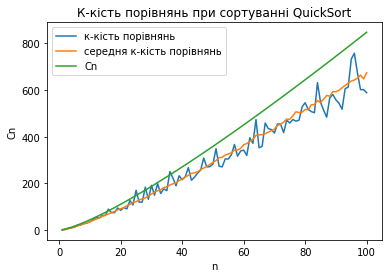

In [32]:
plt.plot(x, y1, label="к-кість порівнянь")
plt.plot(x, y2, label="середня к-кість порівнянь")
plt.plot(x, y3, label="Cn")
plt.xlabel("n")
plt.ylabel("Cn")
plt.title("К-кість порівнянь при сортуванні QuickSort")
plt.legend()
plt.show()

**(г) (Розподіл складності)** Побудуйте наступні гістограми для $QuickSort$ та $MergeSort$ та $n=9, 10$. Перебираємо всі $n!$ перестановок чисел $1, 2, ..., n$. Будемо сортувати перестановки та обчислювати кількість порівнянь (транспозицій), які при цьому відбуваються. Нехай $f(k)$ дорівнює кількості перестановок, для яких кількість порівнянь (транспозицій) дорівнює $k$. Зобразіть функцію $f(k)$.

In [33]:
def merge_sort_modified(array):
    """ Функція повертає к-кість порівнянь необхідних для сортування 
    масиву array за алгоритмом MergeSort. """
    def merge_sort(array):
        if len(array) <= 1:
            return array

        half = len(array) // 2
        left = merge_sort(array[:half])
        right = merge_sort(array[half:])
        return merge(left, right)


    def merge(left, right):
        global num

        left_index = 0
        right_index = 0
        result = []
        while left_index < len(left) and right_index < len(right):
            num += 1
            if left[left_index] < right[right_index]:
                num += 1
                result.append(left[left_index])
                left_index += 1
            else:
                num += 1
                result.append(right[right_index])
                right_index += 1

        result += left[left_index:]
        result += right[right_index:]
        return result
    
    global num  # шукана к-кість порівнянь
    num = 0
    merge_sort(array)
    return num

In [36]:
def build_hist(alg, n):
    x = []
    for p in list(permutations(list(range(1, n + 1)))):
        p = list(p)
        
        if alg == "quicksort":
            s = quick_sort_modified(p)
        elif alg == "mergesort":
            s = merge_sort_modified(p)
        x.append(s)
        
    plt.title("{}, n={}".format(alg, n))
    plt.hist(x, bins = len(set(x)))
    
    x1 = sorted(list(set(x)))
    y1 = [x.count(i) for i in x1]
    plt.plot(x1, y1, "--", color="black")
    plt.xlabel("к-кість порівнянь, k")
    plt.ylabel("к-кість перестановок, f(k)")
    plt.show()

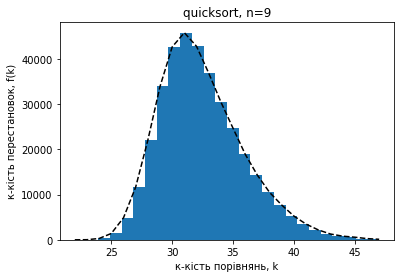

In [37]:
build_hist("quicksort", 9)

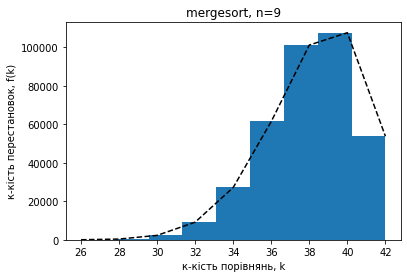

In [38]:
build_hist("mergesort", 9)

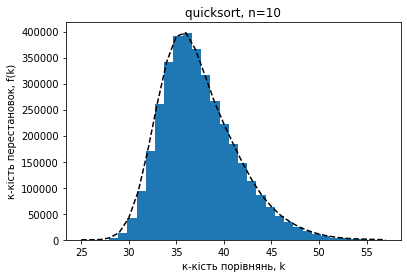

In [39]:
build_hist("quicksort", 10)

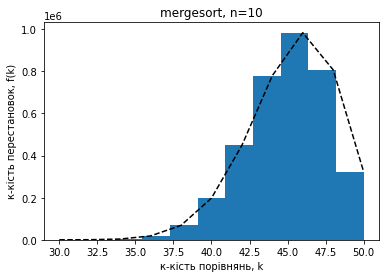

In [40]:
build_hist("mergesort", 10)